# Kata Kunci Berita


Mencari dokumen melalui kata kunci dapat mempermudah kita dalam mencari suatu dokumen yang relevan. Kata Kunci merupakan kata yang penting dan sering muncul dalam sebuah teks maupun dokumen. Biasanya kata kunci mengandung kata yang unik, dan bermakna spesifik.


## Proses Pembersihan Teks


### Import Library


In [32]:
# Library untuk text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Library untuk data manipulation
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

# Library untuk text similarity
from sklearn.metrics.pairwise import cosine_similarity 

### Load Data


In [33]:
data = pd.read_csv('../tugas1/data_100.csv')
data

,judul,tanggal,isi,kategori
0,FOTO: Melihat Kehancuran Gaza usai Satu Tahun ...,"Senin, 07 Okt 2024 10:30 WIB",Satu tahun agresi Israel ke Gaza yang dimulai ...,internasional
1,"VIDEO: Setahun Agresi Israel ke Gaza, Korban T...","Senin, 07 Okt 2024 10:03 WIB",Agresi Israel ke Jalur Gaza telah memasuki sat...,internasional
2,Jenderal Brigade Al-Quds Iran Hilang usai Isra...,"Senin, 07 Okt 2024 09:59 WIB","Kepala pasukan Brigade Al-Quds Iran, Esmail Qa...",internasional
3,VIDEO: Kelompok Militan Pakistan Serang Karach...,"Senin, 07 Okt 2024 09:28 WIB",Sebuah ledakan terjadi di dekat bandara intern...,internasional
4,"Setahun Agresi Gaza, Israel Was-was Antisipasi...","Senin, 07 Okt 2024 09:25 WIB",Pasukan Pertahanan Israel (IDF) bersiaga ketat...,internasional
...,...,...,...,...
95,VIDEO: Momen Perang Yel-yel Warnai Debat Perda...,"Minggu, 06 Okt 2024 20:42 WIB",Perang yel-yel dari tiga pendukung calon guber...,nasional
96,Dharma Sindir Gagasan RK-Pramono soal Kemaceta...,"Minggu, 06 Okt 2024 20:34 WIB","Calon gubernur jalur independen, Dharma Pongre...",nasional
97,Pramono Janji Buat Jaringan Transjakarta hingg...,"Minggu, 06 Okt 2024 20:31 WIB",Calon gubernur Jakarta Pramono Anung berjanji ...,nasional
98,Jurus RK Atasi Macet: Bikin Angkutan Sungai Hi...,"Minggu, 06 Okt 2024 20:29 WIB",Calon Gubernur Jakarta Ridwan Kamil mengungkap...,nasional


### Preprocessing Text


In [34]:
def clean_text(text):
	text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Menghapus https* and www*
	text = re.sub(r'@[^\s]+', ' ', text) # Menghapus username
	text = re.sub(r'[\s]+', ' ', text) # Menghapus tambahan spasi
	text = re.sub(r'#([^\s]+)', ' ', text) # Menghapus hashtags
	text = re.sub(r"[^a-zA-Z : .]", "", text) # Menghapus tanda baca
	text = re.sub(r'\d', ' ', text) # Menghapus angka
	text = text.lower()
	text = text.encode('ascii','ignore').decode('utf-8') #Menghapus ASCII dan unicode
	text = re.sub(r'[^\x00-\x7f]',r'', text)
	text = text.replace('\n','') #Menghapus baris baru
	text = text.strip()
	return text

def clean_stopword(tokens):
	listStopword =  set(stopwords.words('indonesian'))
	filtered_words = [word for word in tokens if word.lower() not in listStopword]
	return filtered_words

Membersihkan text dari tanda baca yang ada, kemudian menyesuaikan text agar bisa diolah lebih lanjut.


In [35]:
def preprocess_text(content):
	result = {}
	for i, text in enumerate(tqdm(content)):
		cleaned_text = clean_text(text)
		tokens = word_tokenize(cleaned_text)
		cleaned_stopword = clean_stopword(tokens)
		result[i] = ' '.join(cleaned_stopword)
	return result

data['cleaned_news'] = preprocess_text(data['isi'])
data

100%|██████████| 100/100 [00:00<00:00, 263.21it/s]


,judul,tanggal,isi,kategori,cleaned_news
0,FOTO: Melihat Kehancuran Gaza usai Satu Tahun ...,"Senin, 07 Okt 2024 10:30 WIB",Satu tahun agresi Israel ke Gaza yang dimulai ...,internasional,agresi israel gaza oktober warga palestina ter...
1,"VIDEO: Setahun Agresi Israel ke Gaza, Korban T...","Senin, 07 Okt 2024 10:03 WIB",Agresi Israel ke Jalur Gaza telah memasuki sat...,internasional,agresi israel jalur gaza memasuki senin . rent...
2,Jenderal Brigade Al-Quds Iran Hilang usai Isra...,"Senin, 07 Okt 2024 09:59 WIB","Kepala pasukan Brigade Al-Quds Iran, Esmail Qa...",internasional,kepala pasukan brigade alquds iran esmail qaan...
3,VIDEO: Kelompok Militan Pakistan Serang Karach...,"Senin, 07 Okt 2024 09:28 WIB",Sebuah ledakan terjadi di dekat bandara intern...,internasional,ledakan bandara internasional karachi pakistan...
4,"Setahun Agresi Gaza, Israel Was-was Antisipasi...","Senin, 07 Okt 2024 09:25 WIB",Pasukan Pertahanan Israel (IDF) bersiaga ketat...,internasional,pasukan pertahanan israel idf bersiaga ketat p...
...,...,...,...,...,...
95,VIDEO: Momen Perang Yel-yel Warnai Debat Perda...,"Minggu, 06 Okt 2024 20:42 WIB",Perang yel-yel dari tiga pendukung calon guber...,nasional,perang yelyel pendukung calon gubernur dki jak...
96,Dharma Sindir Gagasan RK-Pramono soal Kemaceta...,"Minggu, 06 Okt 2024 20:34 WIB","Calon gubernur jalur independen, Dharma Pongre...",nasional,calon gubernur jalur independen dharma pongrek...
97,Pramono Janji Buat Jaringan Transjakarta hingg...,"Minggu, 06 Okt 2024 20:31 WIB",Calon gubernur Jakarta Pramono Anung berjanji ...,nasional,calon gubernur jakarta pramono anung berjanji ...
98,Jurus RK Atasi Macet: Bikin Angkutan Sungai Hi...,"Minggu, 06 Okt 2024 20:29 WIB",Calon Gubernur Jakarta Ridwan Kamil mengungkap...,nasional,calon gubernur jakarta ridwan kamil mengungkap...


### Memisahkan Kalimat menjadi per Kata


In [36]:
kalimat = nltk.sent_tokenize(data['cleaned_news'][4])
kalimat = [sentence.replace('.', '') for sentence in kalimat]
kata = nltk.word_tokenize(data['cleaned_news'][4])
kata = list(set(k for k in kata if k != '.'))

In [37]:
kalimat

['pasukan pertahanan israel idf bersiaga ketat perbatasan menjelang agresi jalur gaza palestina minggu ',
 'idf bersiaga mengantisipasi serangan kelompok milisi hamas palestina senin peringatan konflik oktober ',
 'the times of israel melaporkan idf memperkuat pasukan perbatasan mengantisipasi serangan roket jarak ditembakkan gaza ',
 'sumber militer percaya hamas serangan roket operasinya ditumpas israel ',
 'komando selatan pertahanan serangan skenario bulanbulan bersamaan acara peringatan dilaksanakan aman pernyataan idf ',
 'militer hamas menembakkan roket gaza perbatasan israel ',
 'militer memperkuat pertahanan perbatasan gaza koridor netzarim lokasi pendudukan idf ',
 'kompi dilaporkan dikerahkan menjaga kotakota perbatasan zionis ',
 'kewaspadaan ',
 'tingkat kesiapan tindakan ofensif kepala komando selatan yaron finkelman ',
 'sabtu malam juru bicara idf daniel hagari mewantiwanti warga sipil berhatihati ',
 'meningkatkan pasukan mengantisipasi ',
 'agresi israel gaza senin me

In [38]:
kata

['times',
 'menjaga',
 'tel',
 'perbatasan',
 'berkumpul',
 'gaza',
 'palestina',
 'menjelang',
 'bicara',
 'zionis',
 'menggelar',
 'tindakan',
 'menembakkan',
 'skenario',
 'peringatan',
 'dikabarkan',
 'digelar',
 'jarak',
 'orang',
 'penyanderaan',
 'bulanbulan',
 'menewaskan',
 'mewantiwanti',
 'berhatihati',
 'milisi',
 'bersamaan',
 'pasukan',
 'yarkon',
 'percaya',
 'melaporkan',
 'malam',
 'operasinya',
 'lokasi',
 'ditumpas',
 'daniel',
 'diluncurkan',
 'keluarga',
 'pertahanan',
 'of',
 'jalur',
 'ditawan',
 'selatan',
 'meningkatkan',
 'gencatan',
 'minggu',
 'juru',
 'israel',
 'koridor',
 'ofensif',
 'kewaspadaan',
 'tewas',
 'kelompok',
 'diyakini',
 'aviv',
 'komando',
 'upacara',
 'pernyataan',
 'ketat',
 'hagari',
 'dilaksanakan',
 'pemerintah',
 'terbatas',
 'senin',
 'kepala',
 'memperkuat',
 'kompi',
 'serangan',
 'mengantisipasi',
 'tingkat',
 'dilaporkan',
 'kesiapan',
 'pendudukan',
 'acara',
 'warga',
 'finkelman',
 'disandera',
 'meninggal',
 'kotakota',
 'sip

## Membuat Matriks


### Menghitung kemunculan kata


frekuensi kemunculan dua kata atau istilah yang berdekatan secara berurutan dalam kumpulan teks. Dalam linguistik, kemunculan kata/co-occurrence dapat menjadi indikator kedekatan semantik.


In [39]:
def vektor_kata(data):
	vektor_kata = pd.DataFrame(0, index=range(len(data)), columns=kata)
	
	for i, sent in enumerate(data):
		# Tokenisasi kalimat menjadi kata-kata
		kata_kalimat = word_tokenize(sent)
		
		# Hitung frekuensi setiap kata dalam kalimat
		for word in kata_kalimat:
			if word in kata:
				vektor_kata.at[i, word] += 1

	return vektor_kata

In [40]:
df_vektor_kata = vektor_kata(kalimat)
df_vektor_kata

,times,menjaga,tel,perbatasan,berkumpul,gaza,palestina,menjelang,bicara,zionis,...,dikerahkan,oktober,catatan,pasca,sabtu,agresi,taman,idf,senjata,yaron
0,0,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,1,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Cosine Similarity


Cosine similarity digunakan untuk mengukur seberapa mirip dua vektor dalam ruang berdimensi banyak. Hasil dari cosine similarity ini akan menentukan apakah vektor tersebut menuju ke arah yang sama. Semakin kecil sudut antara dua vektor, maka semakin mirip satu sama lain sedangkan begitu juga sebaliknya, semakin besar nilai cosine similarity maka vektor tersebut dianggap jauh kemiripannya. Dalam ringkasan dokumen ini penting untuk menghitung nilai cosine similarity untuk mengetahui hubungan kesamaan antara kalimat satu dengan kalimat lainnya. Vektor yang digunakan untuk menghitung nilai cosine simmilarity ini adalah hasil dari TF-IDF pada langkah sebelumnya.


$$simmilarity(A, B) = \frac{A \cdot B}{|A||B|}$$


Keterangan:

$A.B$ = Vector dot product dari A dan B dihitung dengan $\sum_{i=1}^n x_{i}y_{i}$

$|A|$ = Panjang vektor A dihitung dengan $\sum_{i=1}^n x_{i}^2$ = $\sqrt{\mathrm{a}_{1}^{2} + \mathrm{a}_{2}^{2} + \mathrm{a}_{3}^{2}} +...+ \mathrm{n}_{n}^{2}$

$|B|$ = Panjang vektor B dihitung dengan $\sum_{i=1}^n y_{i}^2$ = $\sqrt{\mathrm{b}_{1}^{2} + \mathrm{b}_{2}^{2} + \mathrm{b}_{3}^{2}} + ...+ \mathrm{n}_{n}^{2}$


In [41]:
cossim = cosine_similarity(df_vektor_kata)

similarity_matrix = pd.DataFrame(cossim, index=range(len(kalimat)), columns=range(len(kalimat)))

similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.000000,0.240192,0.358057,0.092450,0.153846,0.314485,0.350823,0.104828,0.0,0.0000,...,0.160128,0.000000,0.113228,0.277350,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.240192,1.000000,0.223607,0.192450,0.240192,0.109109,0.091287,0.000000,0.0,0.0000,...,0.166667,0.000000,0.117851,0.192450,0.000000,0.192450,0.102062,0.000000,0.0,0.144338
2,0.358057,0.223607,1.000000,0.258199,0.143223,0.390360,0.326599,0.097590,0.0,0.0000,...,0.000000,0.000000,0.105409,0.172133,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.092450,0.192450,0.258199,1.000000,0.092450,0.503953,0.105409,0.000000,0.0,0.0000,...,0.000000,0.000000,0.272166,0.222222,0.000000,0.111111,0.000000,0.000000,0.0,0.000000
4,0.153846,0.240192,0.143223,0.092450,1.000000,0.000000,0.175412,0.000000,0.0,0.1849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.092450,0.000000,0.000000,0.0,0.138675
5,0.314485,0.109109,0.390360,0.503953,0.000000,1.000000,0.358569,0.142857,0.0,0.0000,...,0.000000,0.000000,0.308607,0.377964,0.000000,0.125988,0.000000,0.000000,0.0,0.000000
6,0.350823,0.091287,0.326599,0.105409,0.175412,0.358569,1.000000,0.119523,0.0,0.0000,...,0.000000,0.000000,0.000000,0.105409,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,0.104828,0.000000,0.097590,0.000000,0.000000,0.142857,0.119523,1.000000,0.0,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.184900,0.000000,0.000000,0.000000,0.0,1.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


## Graph


Hasil dari nilai _Cosine Simmilarity_ ini akan dapat digunakan untuk membentuk graph dengan menggunakan modul nx.graph. Graph ini akan menggambarkan ilustrasi dari kedekatan setiap kalimatnya dalam berita tersebut. Dalam proses penggambaran graph tersebut diperlukan ambang batas _(threshold)_ yang digunakan untuk memberikan batasan agar keseluruhan kalimatnya tidak dihubungkan menggunakan garis _(edge)_. Nilai ambang batas _(threshold)_ yang digunakan adalah **0.1**


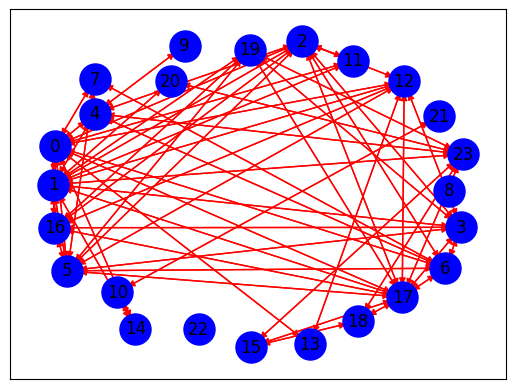

In [42]:
G = nx.DiGraph()
for i in range(len(cossim)):
	G.add_node(i)

for i in range(len(cossim)):
	for j in range(len(cossim)):
		similarity = cossim[i][j]
		if similarity > 0.1 and i != j:
			G.add_edge(i, j)

pos = nx.spring_layout(G, k=4)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='red', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

## Matrix Centralitas


Matriks Sentralitas adalah matriks yang digunakan untuk merepresentasikan ukuran sentralitas dari setiap node dalam jaringan. Sentralitas adalah konsep dalam analisis jaringan yang mencoba mengukur sejauh mana suatu node berada di pusat jaringan atau sejauh mana suatu node penting dalam graph.


### PageRank


Dalam konteks ini, dokumen dianggap sebagai “halaman” yang terhubung oleh hubungan yang merefleksikan keterkaitan atau relevansinya. Dengan menerapkan konsep PageRank, dokumen yang dianggap lebih “penting” atau relevan dapat diberikan skor lebih tinggi. Penggunaan faktor damping, serupa dengan dalam algoritma PageRank, dapat membantu mengontrol sejauh mana pengaruh satu dokumen terhadap yang lain. Dengan memberikan skor pada dokumen berdasarkan hubungan mereka dalam jaringan informasi, kita dapat menghasilkan ringkasan yang mencerminkan tingkat relevansi dan pentingnya masing-masing dokumen dalam konteks keseluruhan.


$$PR_i = \frac{1-d}{n} + d \sum_{P_j\in\{1 \dots,n\}} \frac{PR_i}{L_j}$$


Keterangan:

$PR(i)$ = adalah PageRank dari halaman web ke i.<br>
$d$ = adalah faktor redaman, biasanya diatur sebesar 0,85, yang digunakan untuk menghitung probabilitas bahwa peramban acak akan “melompat” ke halaman acak dan tidak mengikuti sebuah link.<br>
$PR(i)$ = adalah PageRank halaman ke i, yaitu halaman yang memiliki sambungan yang mengarah ke halaman i.<br>
$L(c)$ = adalah jumlah hubungan keluar pada halaman j.


In [43]:
pagerank = nx.pagerank(G)

sorted_pagerank= sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("Page Rank :")
for node, pagerank in sorted_pagerank:
	print(f"Node {node}: {pagerank:.4f}")

Page Rank :
Node 1: 0.0908
Node 0: 0.0851
Node 17: 0.0807
Node 2: 0.0669
Node 5: 0.0660
Node 12: 0.0549
Node 23: 0.0544
Node 16: 0.0531
Node 3: 0.0530
Node 6: 0.0492
Node 4: 0.0485
Node 19: 0.0419
Node 10: 0.0342
Node 14: 0.0332
Node 15: 0.0266
Node 18: 0.0266
Node 11: 0.0244
Node 7: 0.0243
Node 21: 0.0213
Node 20: 0.0193
Node 13: 0.0186
Node 9: 0.0136
Node 8: 0.0067
Node 22: 0.0067


### Hasil Kata Kunci


In [44]:
print("Tiga Node Tertinggi Page Rank :")
sentence = ""
for node, pagerank in sorted_pagerank[:3]:
	top_sentence = kata[node]
	sentence += top_sentence + ", "
	print(f"Node {node}: Page Rank = {pagerank:.4f}")
	print(f"Kalimat: {top_sentence}")

Tiga Node Tertinggi Page Rank :
Node 1: Page Rank = 0.0908
Kalimat: menjaga
Node 0: Page Rank = 0.0851
Kalimat: times
Node 17: Page Rank = 0.0807
Kalimat: jarak


In [45]:
print('Kata Kunci :', sentence)

Kata Kunci : menjaga, times, jarak, 
